## Observations and Insights 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.concat([mouse_metadata, study_results])
# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,NaN,NaN,NaN
1,s185,Capomulin,Female,3.0,17.0,NaN,NaN,NaN
2,x401,Capomulin,Female,16.0,15.0,NaN,NaN,NaN
3,m601,Capomulin,Male,22.0,17.0,NaN,NaN,NaN
4,g791,Ramicane,Male,11.0,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1888,r944,NaN,NaN,NaN,NaN,45.0,41.581521,2.0
1889,u364,NaN,NaN,NaN,NaN,45.0,31.023923,3.0
1890,p438,NaN,NaN,NaN,NaN,45.0,61.433892,1.0
1891,x773,NaN,NaN,NaN,NaN,45.0,58.634971,4.0


In [29]:
# Checking the number of mice.
mouse_count = len(combined_df)
mouse_count

2142

In [30]:
combined_df.count()

Mouse ID              2142
Drug Regimen           249
Sex                    249
Age_months             249
Weight (g)             249
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df["Mouse ID"].value_counts()



g989    14
r604    11
u364    11
g791    11
t724    11
        ..
t573     2
n482     2
h428     2
f932     2
l872     2
Name: Mouse ID, Length: 249, dtype: int64

In [32]:
combined_df["Timepoint"].value_counts()

0.0     250
5.0     238
10.0    223
15.0    207
20.0    195
25.0    183
30.0    171
35.0    154
40.0    142
45.0    130
Name: Timepoint, dtype: int64

In [33]:
info_df = pd.DataFrame(combined_df, columns=["Mouse ID", "Timepoint"])
info_df

,Mouse ID,Timepoint
0,k403,NaN
1,s185,NaN
2,x401,NaN
3,m601,NaN
4,g791,NaN
...,...,...
1888,r944,45.0
1889,u364,45.0
1890,p438,45.0
1891,x773,45.0


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 

info_df.sort_values("Mouse ID", inplace=True)
info_df

,Mouse ID,Timepoint
113,a203,0.0
1315,a203,30.0
1675,a203,40.0
1295,a203,25.0
598,a203,10.0
...,...,...
248,z969,NaN
909,z969,15.0
1407,z969,30.0
1076,z969,20.0


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mousedata_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
clean_mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_mousedata_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [37]:
#column with Tumor volumme
tumors= clean_mousedata_df['Tumor Volume (mm3)']
tumors

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor Volume (mm3), Length: 1893, dtype: float64

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumors= clean_mousedata_df['Tumor Volume (mm3)']
tumors

mean_numpy = np.mean(tumors)
mean_numpy
median_numpy = np.median(tumors)
median_numpy
var_numpy = np.var(tumors,ddof = 0)
var_numpy
sd_numpy = np.std(tumors,ddof = 0)
sd_numpy
sem = stats.sem(clean_mousedata_df["Tumor Volume (mm3)"])

Tumor_volume_summary_df = pd.DataFrame({"Mean Volume": [mean_numpy],
                                        "Median Volume": [median_numpy],
                                       "Variance Volume": [var_numpy],
                                       "Standard Deviation": [sd_numpy],
                                       "SEM": [sem]})
Tumor_volume_summary_df




,Mean Volume,Median Volume,Variance Volume,Standard Deviation,SEM
0,50.448381,48.951474,79.07428,8.892372,0.204436


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mean_numpy = np.mean(tumors)
print(f"The mean tumor volume for each regiment is {mean_numpy}")

median_numpy = np.median(tumors)
print(f"The median tumor volume for each regiment is {median_numpy}")

var_numpy = np.var(tumors,ddof = 0)
print(f"The tumor volume variance for each regiment is {var_numpy}")

sd_numpy = np.std(tumors,ddof = 0)
print(f"The tumor volume standard deviation for each regiment is {sd_numpy}")

sem = stats.sem(clean_mousedata_df["Tumor Volume (mm3)"])
print(f"The SEM value of the tumor volume is {sem}")

The mean tumor volume for each regiment is 50.448380631336505
The median tumor volume for each regiment is 48.95147442
The tumor volume variance for each regiment is 79.07427999025795
The tumor volume standard deviation for each regiment is 8.892372011463417
The SEM value of the tumor volume is 0.20443585034961514


## Bar and Pie Charts

In [40]:
x_axis = clean_mousedata_df['Drug Regimen']
x_axis

0       Ramicane
1       Ramicane
2       Ramicane
3       Ramicane
4       Ramicane
          ...   
1888    Naftisol
1889    Naftisol
1890    Naftisol
1891    Naftisol
1892    Naftisol
Name: Drug Regimen, Length: 1893, dtype: object

In [41]:
y_axis=np.arange(len(y_axis))
y_axis

array([   0,    1,    2, ..., 1890, 1891, 1892])

<BarContainer object of 1893 artists>

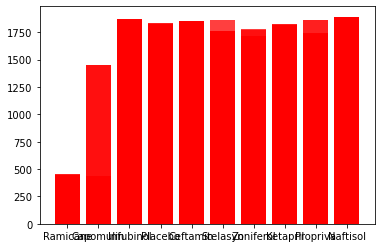

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_mousedata_df

x_axis = clean_mousedata_df['Drug Regimen']
y_axis = np.arange(len(x_axis))


plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

<BarContainer object of 1893 artists>

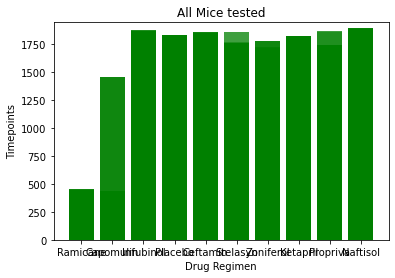

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.title("All Mice tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.ylim(0, max(y_axis)+50.0)



plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mousedata_df
a=clean_mousedata_df['Sex']

gender = ["male","female"]




In [94]:
# Male count
np.sum(a == "Male")

958

In [95]:
#Female count
np.sum(a== "Female")

935

([<matplotlib.patches.Wedge at 0x250f58a7a60>,
 [Text(-0.02099250347258543, 1.0997996703027118, ''),
  Text(0.020992503472585782, -1.0997996703027118, '')])

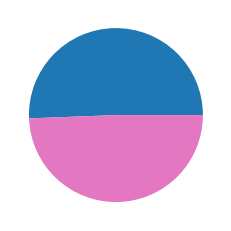

In [96]:
# The values of each section of the pie chart
sizes = [958, 935]

# The colors of each section of the pie chart
colors = ["tab:blue", "tab:pink"]

plt.pie(sizes, colors=colors)

([<matplotlib.patches.Wedge at 0x250f58f0610>,
 [Text(-0.022900912879184103, 1.1997814585120492, 'male'),
  Text(0.020992503472585782, -1.0997996703027118, 'female')],
 [Text(-0.013358865846190724, 0.699872517465362, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

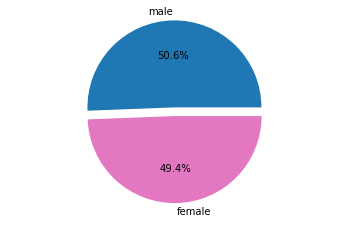

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1,0)
plt.axis("equal")
labels=list(gender)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
